In [4]:
pip install citipy


     -------------------------------------- 557.7/557.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=3f1562dad58686925a6ce1cbe1de27e9b3d83c9ccc22eae9ba271593724b6d3f
  Stored in directory: c:\users\lealr\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the openweather api using key
from api_keys import weather_api_key

# Citipy dependency
from citipy import citipy

# Getting the data file (csv)
output_data = pd.read_csv(r"\Users\lealr\OneDrive\DU Bootcamp\Python APIs\API-challenge\output_data\cities.csv")
output_data

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
0,Nanortalik,60.1432,-45.2371,23.23,82,1680407428,5.73,84,GL
1,Chiredzi,-21.0500,31.6667,64.11,95,1680407429,2.39,1,ZW
2,Lompoc,34.6391,-120.4579,52.61,84,1680407220,12.66,0,US
3,Yārāda,17.6500,83.2667,84.52,74,1680407429,8.05,20,IN
4,Port Lincoln,-34.7333,135.8667,63.03,56,1680407430,12.21,80,AU
...,...,...,...,...,...,...,...,...,...
556,Hendek,40.7994,30.7481,54.03,78,1680407576,4.99,100,TR
557,Haines Junction,60.7522,-137.5108,26.55,46,1680407576,12.66,100,CA
558,Tezu,27.9167,96.1667,65.17,92,1680407577,1.16,100,IN
559,Masallātah,32.6167,14.0000,61.03,64,1680407577,8.21,12,LY


In [162]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [163]:
output_data.columns

Index(['City', 'Latitude', 'Longitude', 'Max Temp', 'Humidity', 'Data',
       'Wind Speed', 'Cloudiness', 'Country'],
      dtype='object')

In [164]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
latitude_list = []
longitude_list = []
temp_max_list = []
humidity_list = []
wind_speed_list = []
date_list = []
country_list = []
city_list = []
cloudiness_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send the API request and get the response
        response = requests.get(city_url)
        
        # Check if the response status code is OK (200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']
            city_name = city_weather['name']

            # Append the City information into city_data list
            latitude_list.append(city_lat)
            longitude_list.append(city_lng)
            temp_max_list.append(city_max_temp)
            humidity_list.append(city_humidity)
            wind_speed_list.append(city_wind)
            date_list.append(city_date)
            country_list.append(city_country)
            cloudiness_list.append(city_clouds)
            city_list.append(city_name)
        else:
            print(f"City not found. Skipping {city}...")
    
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred while processing {city}: {e}. Skipping...")
    pass
print("--------------------------------------------------------------------")
print("Data Retrieval Complete")
print("--------------------------------------------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | bluff
Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | gari
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | zhangye
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | hobyo
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | yumen
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | san policarpo
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | pasvalys
Processing Record 19 of Set 1 | honiara
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | mataram
Processing Record 22 of Set 1 | punta arenas
Processing 

Processing Record 30 of Set 4 | inhambane
Processing Record 31 of Set 4 | blagoyevo
Processing Record 32 of Set 4 | beisfjord
Processing Record 33 of Set 4 | yar-sale
Processing Record 34 of Set 4 | ponta do sol
Processing Record 35 of Set 4 | victoria
Processing Record 36 of Set 4 | lagos
Processing Record 37 of Set 4 | kodinsk
Processing Record 38 of Set 4 | portland
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | djenne
Processing Record 41 of Set 4 | qui nhon
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | umm kaddadah
Processing Record 45 of Set 4 | tarn taran
Processing Record 46 of Set 4 | maneadero
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | sistranda
Processing Record 49 of Set 4 | los chiles
Processing Record 0 of Set 5 | awjilah
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | olinda
Processing Record 3 of Set 5 | christchurch
P

Processing Record 22 of Set 8 | teguldet
Processing Record 23 of Set 8 | talakan
Processing Record 24 of Set 8 | nyaunglebin
Processing Record 25 of Set 8 | byron bay
Processing Record 26 of Set 8 | beruwala
Processing Record 27 of Set 8 | itarema
Processing Record 28 of Set 8 | mys shmidta
City not found. Skipping mys shmidta...
Processing Record 29 of Set 8 | ugoofaaru
Processing Record 30 of Set 8 | adamovka
Processing Record 31 of Set 8 | maldonado
Processing Record 32 of Set 8 | drayton valley
Processing Record 33 of Set 8 | mareeba
Processing Record 34 of Set 8 | fukue
Processing Record 35 of Set 8 | jinka
Processing Record 36 of Set 8 | bac lieu
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | jasper
Processing Record 39 of Set 8 | kodiak
Processing Record 40 of Set 8 | san andres
Processing Record 41 of Set 8 | mullaitivu
City not found. Skipping mullaitivu...
Processing Record 42 of Set 8 | mugur-aksy
Processing Record 43 of Set 8 | wilmington
Proce

Processing Record 6 of Set 12 | xiazhen
Processing Record 7 of Set 12 | kavieng
Processing Record 8 of Set 12 | vanavara
Processing Record 9 of Set 12 | lolua
City not found. Skipping lolua...
Processing Record 10 of Set 12 | stamsund
City not found. Skipping stamsund...
Processing Record 11 of Set 12 | mehamn
Processing Record 12 of Set 12 | maningrida
Processing Record 13 of Set 12 | zhifang
Processing Record 14 of Set 12 | muswellbrook
Processing Record 15 of Set 12 | villa rica
Processing Record 16 of Set 12 | conceicao do araguaia
Processing Record 17 of Set 12 | nouadhibou
Processing Record 18 of Set 12 | sibu
Processing Record 19 of Set 12 | arona
Processing Record 20 of Set 12 | champerico
Processing Record 21 of Set 12 | ixtapa
Processing Record 22 of Set 12 | jerome
Processing Record 23 of Set 12 | xique-xique
Processing Record 24 of Set 12 | cumpas
Processing Record 25 of Set 12 | pianco
Processing Record 26 of Set 12 | kurilsk
Processing Record 27 of Set 12 | sambalpur
Proc

In [165]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City" : city_list,
    "Latitude" : latitude_list,
    "Longitude" : longitude_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Data" : date_list,
    "Wind Speed" : wind_speed_list,
    "Cloudiness" : cloudiness_list,
    "Country" : country_list
})

# Show the Record count
city_data_df.count()

City          545
Latitude      545
Longitude     545
Max Temp      545
Humidity      545
Data          545
Wind Speed    545
Cloudiness    545
Country       545
dtype: int64

In [204]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
0,Bluff,-46.6000,168.3333,50.81,71,1680471415,8.52,94,NZ
1,Pangnirtung,66.1451,-65.7125,6.46,82,1680471415,3.98,100,CA
2,Rikitea,-23.1203,-134.9692,80.24,81,1680471415,16.04,24,PF
3,Gari,59.4307,62.3497,33.71,90,1680471415,0.76,100,RU
4,Coquimbo,-29.9533,-71.3436,64.13,88,1680471416,11.50,40,CL


In [205]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\lealr\OneDrive\DU Bootcamp\Python APIs\API-challenge\output_data\cities.csv", index=True)

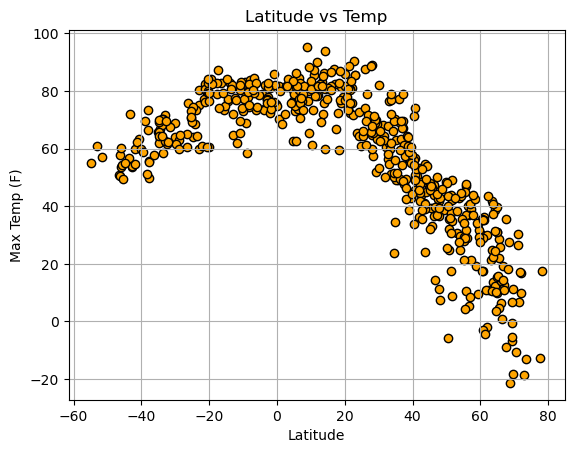

In [206]:
# Build scatter plot for latitude vs. temp
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], facecolor="orange", edgecolor="black")
plt.title("Latitude vs Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.grid()

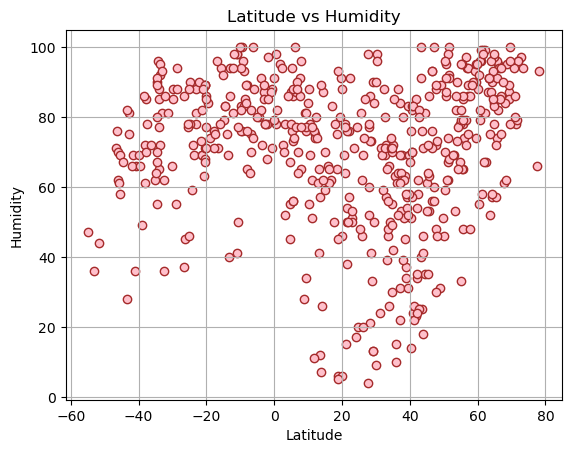

In [207]:
# Latitude vs Humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], facecolor='pink', edgecolor='brown')

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.grid()


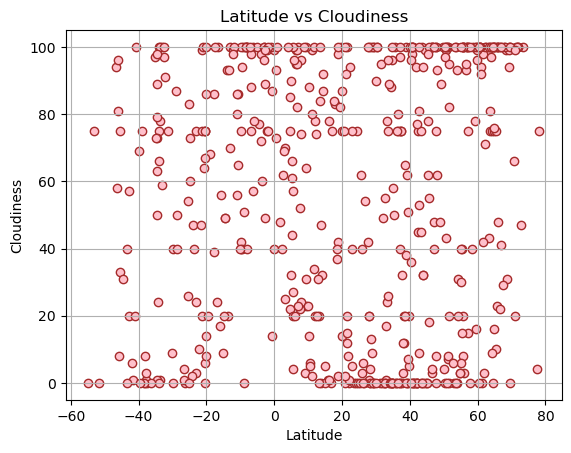

In [208]:
# Latitude vs cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], facecolor='pink', edgecolor='brown')

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.grid()

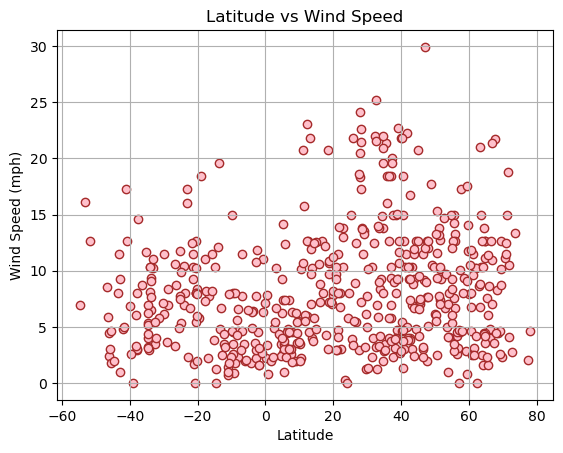

In [209]:
# Latitude vs wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], facecolor='pink', edgecolor='brown')

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()

In [210]:
# Creating dataframes for Northern and Southern Hemispheres
north_hemisphere = city_data_df[city_data_df['Latitude'] >= 0]

south_hemisphere = city_data_df[city_data_df['Latitude'] <= 0]

In [211]:
north_hemisphere.head()

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
1,Pangnirtung,66.1451,-65.7125,6.46,82,1680471415,3.98,100,CA
3,Gari,59.4307,62.3497,33.71,90,1680471415,0.76,100,RU
5,Kavaratti,10.5669,72.6420,81.97,69,1680471416,10.16,6,IN
6,Zhangye,38.9342,100.4517,38.66,37,1680471416,4.72,100,CN
7,Korla,41.7597,86.1469,36.10,23,1680471417,22.28,0,CN


In [212]:
south_hemisphere.head()

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
0,Bluff,-46.6000,168.3333,50.81,71,1680471415,8.52,94,NZ
2,Rikitea,-23.1203,-134.9692,80.24,81,1680471415,16.04,24,PF
4,Coquimbo,-29.9533,-71.3436,64.13,88,1680471416,11.50,40,CL
8,Vaini,-21.2000,-175.2000,82.56,69,1680471417,11.50,20,TO
11,Hermanus,-34.4187,19.2345,66.79,96,1680471418,2.93,24,ZA


The r-value is:  -0.8854898722355224
Equation of the regression line: y = -1.14x + 94.36


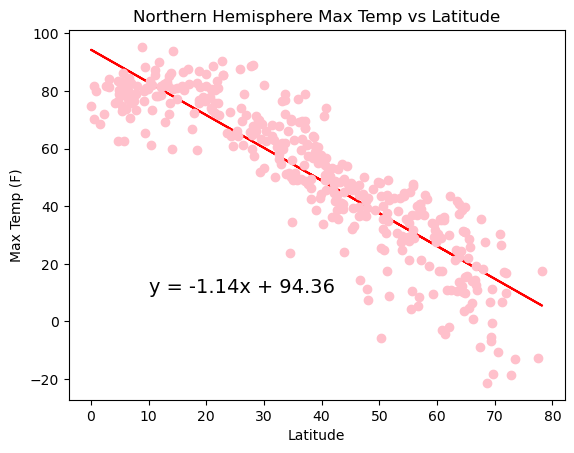

In [213]:
# Linear regression on Northern Hemisphere 

# Calculate the correlation coefficient

# Pearson Correlation coefficent with SCIPY
x = north_hemisphere['Latitude']
y = north_hemisphere['Max Temp']

# Obtain m(slope) and b (intercept) of the linear regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Adding the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(10, 10, equation_line, fontsize=14) 

plt.title('Northern Hemisphere Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')


r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  0.7622946171267366
Equation of the regression line: y = 0.52x + 82.58


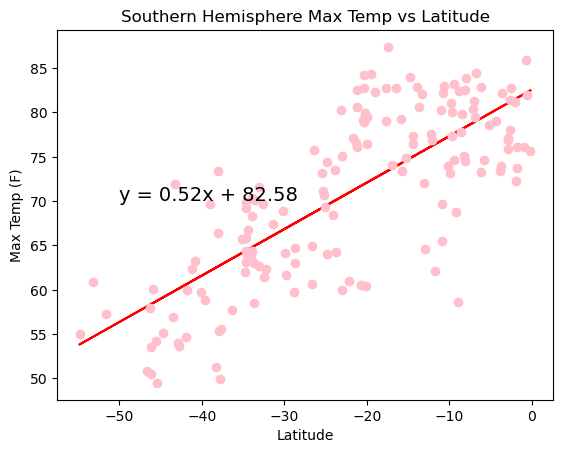

In [214]:
# Linear regression on Southern Hemisphere

x = south_hemisphere['Latitude']
y = south_hemisphere['Max Temp']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-50, 70, equation_line, fontsize=14)

plt.title('Southern Hemisphere Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  0.23831619353773908
Equation of the regression line: y = 0.27x + 57.79


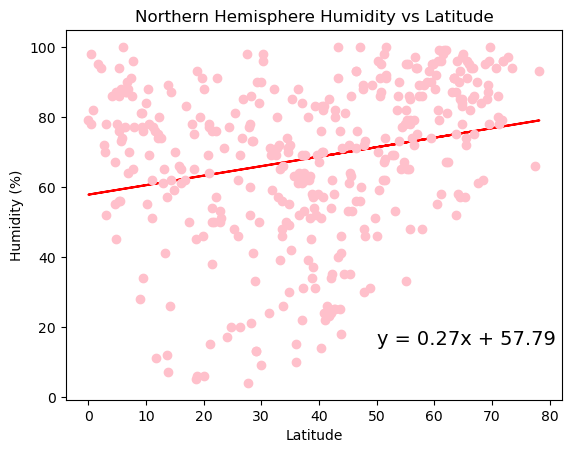

In [215]:
# Humidity Northern Hemisphere
x = north_hemisphere['Latitude']
y = north_hemisphere['Humidity']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(50, 15, equation_line, fontsize=14)

plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))



The r-value is:  0.407469430974118
Equation of the regression line: y = 0.43x + 86.17


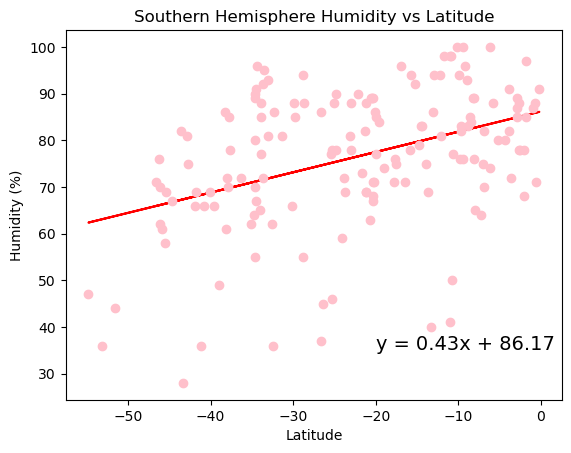

In [216]:
# Humidity Southern Hemisphere
x = south_hemisphere['Latitude']
y = south_hemisphere['Humidity']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-20, 35, equation_line, fontsize=14)

plt.title('Southern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  0.16575842777802918
Equation of the regression line: y = 0.34x + 40.25


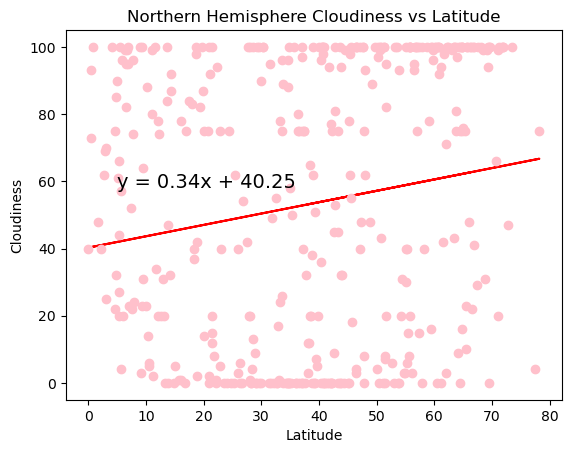

In [217]:
# Cloudiness Northern Hemisphere
x = north_hemisphere['Latitude']
y = north_hemisphere['Cloudiness']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(5, 58, equation_line, fontsize=14)

plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  0.38157532769633895
Equation of the regression line: y = 0.99x + 80.28


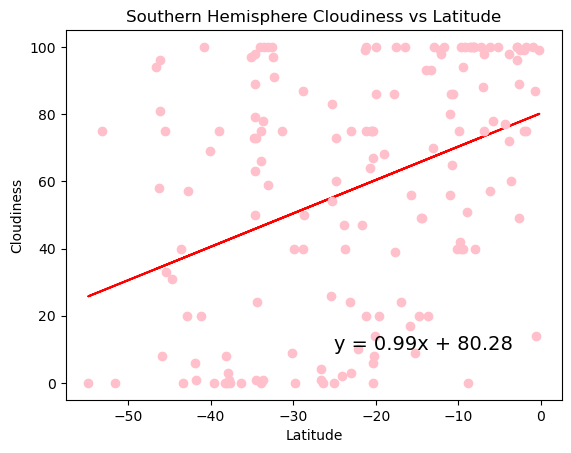

In [218]:
# Cloudiness Southern Hemisphere
x = south_hemisphere['Latitude']
y = south_hemisphere['Cloudiness']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-25, 10, equation_line, fontsize=14)

plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  0.07920367744173316
Equation of the regression line: y = 0.02x + 7.87


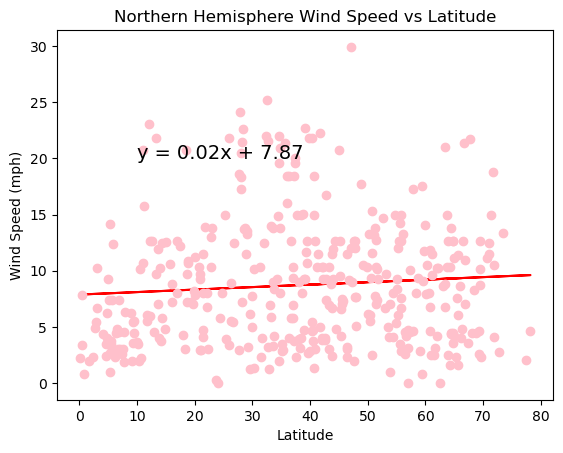

In [219]:
# Wind Speed Northern Hemisphere
x = north_hemisphere['Latitude']
y = north_hemisphere['Wind Speed']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(10, 20, equation_line, fontsize=14)

plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

The r-value is:  -0.16639118984104498
Equation of the regression line: y = -0.05x + 5.44


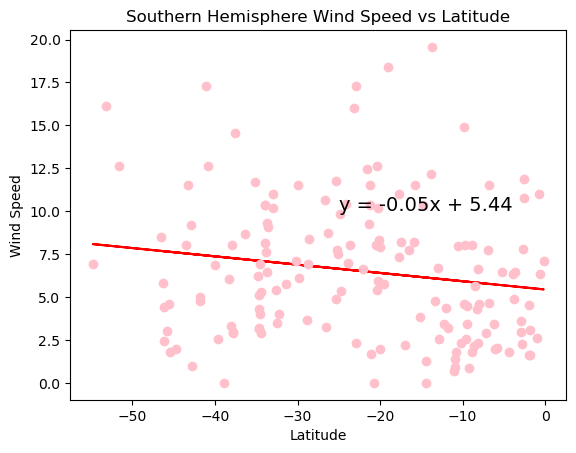

In [220]:
# Southern wind speed
x = south_hemisphere['Latitude']
y = south_hemisphere['Wind Speed']

# Finding the slope and intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.plot(x, y, 'o', color='pink')

# Add the equation
equation_line = 'y = {:.2f}x + {:.2f}'.format(m, b)
plt.text(-25, 10, equation_line, fontsize=14)

plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

r = np.corrcoef(x, y)[0, 1]
print("The r-value is: ", r)

print('Equation of the regression line: y = {:.2f}x + {:.2f}'.format(m, b))

,City,Latitude,Longitude,Max Temp,Humidity,Data,Wind Speed,Cloudiness,Country
0,Bluff,-46.6000,168.3333,50.81,71,1680471415,8.52,94,NZ
1,Pangnirtung,66.1451,-65.7125,6.46,82,1680471415,3.98,100,CA
2,Rikitea,-23.1203,-134.9692,80.24,81,1680471415,16.04,24,PF
3,Gari,59.4307,62.3497,33.71,90,1680471415,0.76,100,RU
4,Coquimbo,-29.9533,-71.3436,64.13,88,1680471416,11.50,40,CL
...,...,...,...,...,...,...,...,...,...
540,Muros,42.7762,-9.0603,52.84,80,1680471590,7.36,81,ES
541,Yatou,37.1500,122.3833,48.83,61,1680471590,3.76,97,CN
542,Camargo,27.6667,-105.1667,88.75,4,1680471565,18.57,100,MX
543,Esmeralda,21.8525,-78.1169,83.44,50,1680471591,13.89,8,CU
